In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import i0
import pandas as pd
import sympy as sp
%matplotlib inline

## Solving the intergration symbolically

In [2]:
T0, T1, T2, q, k, z, L, theta = sp.symbols('T0 T1 T2 q k z L theta') # Defining the symbols
n,m = sp.symbols('n m', integer = True) # Defining the m and as integers for the simplifications of solution

#### Deifing V(z)

In [3]:
V_z = (T2 + (q/(2*k))*z*(L-z) + (T1-T2)*(z/L))
V_z

T2 + q*z*(L - z)/(2*k) + z*(T1 - T2)/L

#### Defining f i.e experssion for cofficient Amn

In [4]:
f = (T0-V_z)*sp.cos(n*theta)*sp.sin((m*sp.pi*z)/L)
f

(T0 - T2 - q*z*(L - z)/(2*k) - z*(T1 - T2)/L)*sin(pi*m*z/L)*cos(n*theta)

#### Integration for the cofficient Amn

In [5]:
final_expr = (2/(L*sp.pi))*sp.integrate(f, (theta, 0, 2*sp.pi), (z, 0, L))
sp.simplify(final_expr)

Piecewise((0, Ne(n, 0)), (4*((-1)**m*L**2*q - (-1)**m*pi**2*k*m**2*(T0 - T1) - L**2*q + pi**2*k*m**2*(T0 - T2))/(pi**3*k*m**3), Ne(m, 0)), (0, True))

#### Defining f i.e experssion for cofficient Bmn

In [6]:
f = (T0-V_z)*sp.sin(n*theta)*sp.sin((m*sp.pi*z)/L)
f

(T0 - T2 - q*z*(L - z)/(2*k) - z*(T1 - T2)/L)*sin(n*theta)*sin(pi*m*z/L)

#### Integration for the cofficient Bmn

In [7]:
final_expr = (2/(L*sp.pi))*sp.integrate(f, (theta, 0, 2*sp.pi), (z, 0, L))
final_expr

0

### Making the function of the solution so that we can analyze on that

In [8]:
def tempDistributionCylinderOne(r,maxRadius,z,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms) :
    T0 = radialSurfaceTemperature
    T1 = upperZtemp
    T2 = lowerZtemp
    k = thermalConductivity
    q = heatGenerationPerUnitVolume
    L = axialLength
    a = maxRadius
    n = noOfTerms
    
    def term1(n,T0,T1,T2):
        return ((2*T0)/(n*np.pi))*(1-(-1)**n) + (2/(np.pi*n))*(T1*((-1)**n)-T2)
    
    def term2(n,L,q,k,T1,T2):
        e = q/k
        return ((2*(L**2)*e)*(-1+((-1)**n)))/((n*np.pi)**3)
    
    def term3(T1 , T2 , L , q , k , z ) :
        return (T2 + (q*z*(L-z))/(2*k)) + ((T1-T2)*z)/L
    
    b = np.zeros(n)
    for i in range(1,n):
        b[i] =  (term1(i,T0,T1,T2) + term2(i,L,q,k,T1,T2))*(i0(i*np.pi*r/L)/i0(np.pi*i*a/L))*np.sin((i*np.pi*z)/L)
        
    return b.sum() + term3(T1 , T2 , L , q , k , z )
   

#### Checking the effect of no. of terms for the point choosen at mid length at the surface 

ValueError: x and y must have same first dimension, but have shapes (459,) and (3458,)

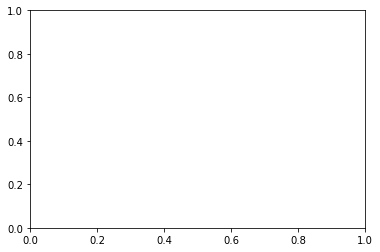

In [30]:
r = 0.49/2
maxRadius = 0.49/2 
z = 0.5/3
axialLength = 0.5
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 60.5
heatGenerationPerUnitVolume = 0
noOfTerms = 460
for i in range(1,noOfTerms) :
    k.append(tempDistributionCylinderOne(r,maxRadius,z,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,i))
x = np.arange(1,noOfTerms)
plt.plot(x,k)
plt.title("Effect of No. of terms \nPoint Choosen is at mid length")
plt.xlabel("Temperature")
plt.ylabel("No. of Terms")
plt.show()

Note that after 2800 terms approx the terms cannot be evaluated as the terms go out of precesion limit of python
but this much accuracy is good enough for our analysis

### Checking wether our Solution follows the Boundary Conditions or not

checking for Boundary Conditions at the surface

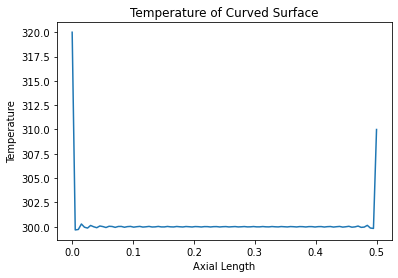

In [24]:
r = 0.49/2
maxRadius = 0.49/2
axialLength = 0.5
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 60.5
heatGenerationPerUnitVolume = 0
noOfTerms = 460
zi = np.linspace(0,axialLength,100)
p = []
for i in zi :
    p.append(tempDistributionCylinderOne(r,maxRadius,i,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(zi,p)
plt.title("Temperature of Curved Surface")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

It gives the same results as we intendeed

#### Checking for the top surface Boundary Condition

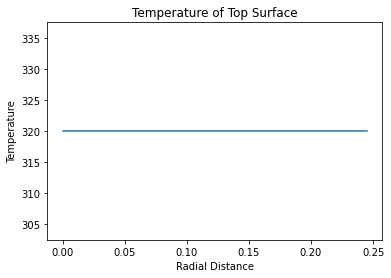

In [25]:
maxRadius = 0.49/2 
z = 0.5
axialLength = 0.5
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 60.5
heatGenerationPerUnitVolume = 0
noOfTerms = 460
ri = np.linspace(0,maxRadius,100)
p = []
for i in ri :
    p.append(tempDistributionCylinderOne(i,maxRadius,0,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(ri,p)
plt.title("Temperature of Top Surface")
plt.xlabel("Radial Distance")
plt.ylabel("Temperature")
plt.show()

C:\Users\vibhe\AppData\Local\Temp/ipykernel_31564/1644610488.py:24: RuntimeWarning: invalid value encountered in double_scalars
  b[i] =  (term1(i,T0,T1,T2) + term2(i,L,q,k,T1,T2))*(i0(i*np.pi*r/L)/i0(np.pi*i*a/L))*np.sin((i*np.pi*z)/L)


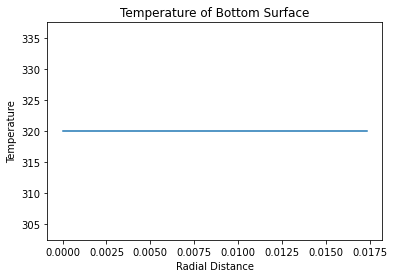

In [12]:
maxRadius = 0.49/2
z = 0
axialLength = 0.5
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 60.5
heatGenerationPerUnitVolume = 0
noOfTerms = 2800
ri = np.linspace(0,maxRadius,100)
p = []
for i in zi :
    p.append(tempDistributionCylinderOne(i,maxRadius,z,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(ri,p)
plt.title("Temperature of Bottom Surface")
plt.xlabel("Radial Distance")
plt.ylabel("Temperature")
plt.show()

### All the Boundary Conditions are met till Here

### Checking the Temperature Distribution at centreLine

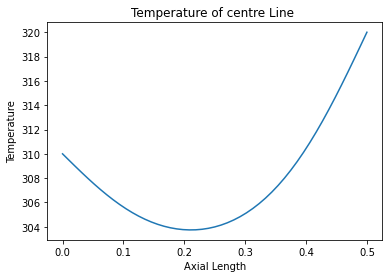

In [13]:

# plt.plot(df["Z"],df["T"])
r = 0
maxRadius = 0.49/2
axialLength = 0.5
radialSurfaceTemperature = 300
upperZtemp = 320
lowerZtemp = 310
thermalConductivity = 60.5
heatGenerationPerUnitVolume = 0
zi = np.linspace(0,axialLength,49)
p = []
for i in zi :
    p.append(tempDistributionCylinderOne(r,maxRadius,i,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms))
plt.plot(zi,p)
plt.title("Temperature of centre Line ")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

#### Real CentreLine Temperature Distribution

In [14]:
df = pd.read_excel("Axial for q 0  r 0.245 L 0.5.xlsx")
df.head()

,Z,Ta,Y,Tr
0,0.0000,310.00,0.000000,303.99
1,0.0104,309.48,0.005104,303.99
2,0.0208,308.97,0.010208,303.98
3,0.0313,308.47,0.015312,303.97
4,0.0417,307.98,0.020417,303.95


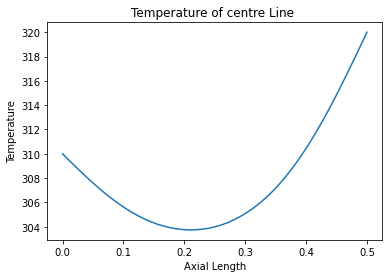

In [15]:
plt.plot(df.Z,df["Ta"])
plt.title("Temperature of centre Line ")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.show()

### Comparision of Both Results

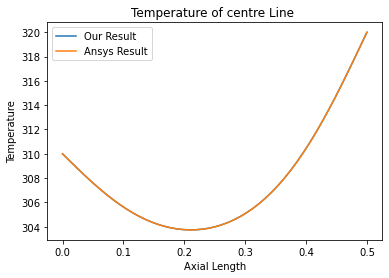

In [16]:
plt.plot(zi,p)
plt.plot(df.Z,df["Ta"])
plt.title("Temperature of centre Line ")
plt.xlabel("Axial Length")
plt.ylabel("Temperature")
plt.legend(["Our Result","Ansys Result"])
plt.show()

It is clear from the above plot that both the results match accurately 

#### Radial Temperature Distribution Verification

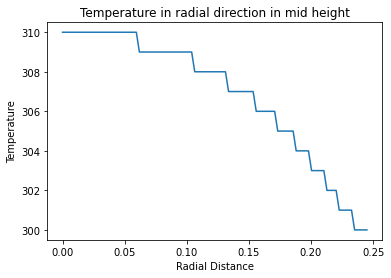

In [35]:
# Radail Temperature Distribution at the mid of the length 

maxRadius = 0.49/2
z = 0.5/5
axialLength = 0.5
radialSurfaceTemperature = 300
upperZtemp = 310
lowerZtemp = 320
thermalConductivity = 60.5
heatGenerationPerUnitVolume = 0
noOfTerms = 460
ri = np.linspace(0,maxRadius,100)
p = []
for i in ri :
    p.append(int(tempDistributionCylinderOne(i,maxRadius,z,axialLength,radialSurfaceTemperature,upperZtemp,lowerZtemp,
                                thermalConductivity,heatGenerationPerUnitVolume,noOfTerms)))
plt.plot(ri,p)
plt.title("Temperature in radial direction in mid height")
plt.xlabel("Radial Distance")
plt.ylabel("Temperature")
plt.show()

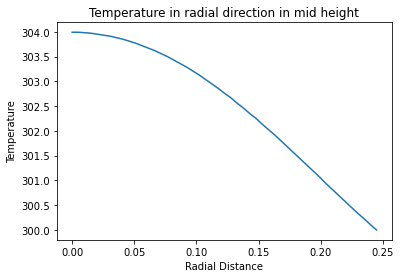

In [32]:
plt.plot(df.iloc[:,2],df["Tr"])
plt.title("Temperature in radial direction in mid height")
plt.xlabel("Radial Distance")
plt.ylabel("Temperature")
plt.show()

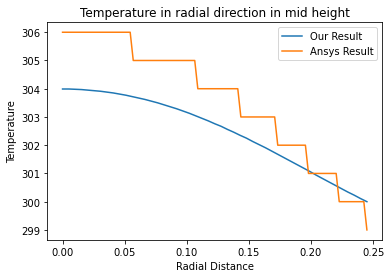

In [33]:
plt.plot(df.iloc[:,2],df["Tr"])
plt.plot(ri,p)
plt.title("Temperature in radial direction in mid height")
plt.xlabel("Radial Distance")
plt.ylabel("Temperature")
plt.legend(["Our Result","Ansys Result"])
plt.show()

Same is the case in radial Direction The results dont match 